# Rover Analytics

## Question 2:  For uncancelled bookings, are owners or providers more likely to leave a review?  Which tends to leave better reviews?

In [92]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
conversations = pd.read_csv('csvs/conversations_conversation.csv')

In [3]:
conv_pets = pd.read_csv('csvs/conversations_conversation_pets.csv')

In [4]:
conv_message = pd.read_csv('csvs/conversations_message.csv')

In [5]:
conv_review = pd.read_csv('csvs/conversations_review.csv')

In [6]:
services = pd.read_csv('csvs/services_service.csv')

In [90]:
services.head() #provider_id matches people_person

,id,service_type,cancellation_policy,can_provide_oral_medication,can_provide_injected_medication,senior_dog_experience,special_needs_experience,takes_small_dogs,takes_medium_dogs,takes_large_dogs,takes_puppies,max_dogs,provider_id,fee,price,added
0,1,boarding,strict,1,1,1,1,0,1,1,1,4,1,0.15,35,2016-08-02 14:59:15.095591
1,2,dog-walking,strict,1,0,1,1,0,0,1,1,5,1,0.15,26,2016-08-02 14:59:15.095591
2,3,boarding,moderate,0,0,1,0,0,0,1,1,2,2,0.15,31,2016-08-02 18:15:30.105940
3,4,dog-walking,strict,1,0,1,0,1,0,0,1,5,2,0.15,27,2016-08-02 18:15:30.105940
4,5,day-care,strict,1,0,1,1,0,1,1,1,5,2,0.15,30,2016-08-02 18:15:30.105940


In [89]:
conversations.head() #requester_id matches people_person #service_id matches services_service

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,1,2018-07-26,2018-07-31,5,2018-07-16 10:17:53.460035,120,NaN,64393,4646,NaN,NaN
1,2,2018-08-10,2018-08-16,6,2018-08-01 10:20:48.626868,132,NaN,64392,10126,NaN,NaN
2,3,2018-06-16,2018-06-19,3,2018-06-05 16:46:39.542467,168,NaN,64391,20677,NaN,NaN
3,4,2018-07-13,2018-07-20,7,2018-07-02 09:12:22.275923,490,NaN,64391,3847,NaN,NaN
4,5,2018-07-02,2018-07-07,5,2018-06-21 16:02:48.694725,140,NaN,64389,9982,NaN,NaN


In [88]:
conv_pets.head() #conv_id goes to conversation_conversation booking id

,id,conversation_id,pet_id
0,1,1,77730
1,2,2,77729
2,3,3,77728
3,4,3,77727
4,5,4,77728


In [87]:
conv_message.head()  #conversation_id matches with conversation_conversation id


,id,sent,content,conversation_id,sender_id
0,1,2018-07-16 10:17:53.460035,Massa class.,1,64393
1,2,2018-07-28 16:53:53.927200,Porta lorem ornare condimentum.,1,2709
2,3,2018-07-16 23:55:22.904038,Neque curae rutrum elit conubia metus in.,1,2709
3,4,2018-07-23 10:05:49.829926,Donec etiam gravida luctus tellus phasellus ri...,1,2709
4,5,2018-08-01 10:20:48.626868,Risus class dui leo sem dui sed sollicitudin.,2,64392


In [14]:
conv_review.head() #conversation_id matches to conversations_conversation. reviewer_id matches people_person

,id,content,stars,conversation_id,reviewer_id
0,1,Netus proin per duis dolor venenatis nam.,1,7,64386
1,2,Dolor proin donec phasellus ve suspendisse ac ...,5,9,64384
2,3,Proin ipsum urna nisl egestas justo class a ar...,5,11,64382
3,4,Porta velit lectus varius donec tellus sollici...,1,13,64381
4,5,Dolor felis.,2,15,64379


In [15]:
conv_cancelled = conversations[(~conversations['booked_at'].isna()) & (~conversations['cancelled_at'].isna())]

In [16]:
conv_cancelled.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
17,18,2018-08-01,2018-08-07,6,2018-07-23 18:11:08.524151,288,requester,64376,18503,2018-07-28 02:24:41.829042,2018-07-31 09:09:27.965552
21,22,2018-06-14,2018-06-19,5,2018-06-05 06:44:01.985076,250,provider,64370,10339,2018-06-09 16:06:08.532196,2018-06-12 04:02:21.445353
54,55,2018-07-27,2018-07-29,2,2018-07-15 07:15:39.875647,92,provider,64336,364,2018-07-19 20:52:38.495156,2018-07-23 22:26:14.972345
62,63,2018-07-29,2018-07-30,1,2018-07-20 17:56:50.838856,19,requester,64328,2254,2018-07-25 06:59:53.310767,2018-07-27 01:58:12.079901
96,97,2018-06-27,2018-06-30,3,2018-06-19 07:48:41.185276,252,provider,64290,7880,2018-06-21 20:34:29.065315,2018-06-25 05:18:47.415560


In [17]:
conv_not_cancelled = conversations[(~conversations['booked_at'].isna()) & (conversations['cancelled_at'].isna())]

In [18]:
conv_not_cancelled.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
5,6,2018-07-04,2018-07-07,3,2018-06-23 16:16:16.891344,78,NaN,64388,14772,2018-06-27 14:39:51.433544,NaN
6,7,2018-07-31,2018-08-04,4,2018-07-21 04:55:57.951572,100,NaN,64386,14783,2018-07-22 02:50:20.676664,NaN
8,9,2018-07-02,2018-07-03,1,2018-06-21 06:23:08.092389,23,NaN,64384,7656,2018-06-23 01:49:33.596667,NaN
10,11,2018-06-12,2018-06-18,6,2018-06-03 09:11:33.421951,300,NaN,64382,2512,2018-06-07 01:24:20.187356,NaN
12,13,2018-07-24,2018-07-27,3,2018-07-13 10:30:05.875588,126,NaN,64381,1634,2018-07-19 01:01:11.552880,NaN


#### Examine the descriptive statistics for the different groups to ensure there aren't glaring differences in booking units or booking total that are worthy of further examination in determining why bookings are cancelled or the conversations don't result in a booking.


In [23]:
conv_no_conversion = conversations[(conversations['booked_at'].isna()) & (conversations['cancelled_at'].isna())]
conv_no_conversion.describe()
#conversations that didn't lead to bookings

,id,units,booking_total,requester_id,service_id
count,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000
mean,40074.750653,4.288907,183.031746,38058.799139,10484.822237
std,23155.210110,2.013765,142.764792,14770.327846,6339.537338
min,1.000000,1.000000,16.000000,12601.000000,1.000000
25%,20086.500000,3.000000,88.000000,25273.250000,4959.000000
50%,40121.500000,4.000000,140.000000,37952.000000,10523.000000
75%,60132.500000,6.000000,240.000000,50792.000000,15980.750000
max,80180.000000,10.000000,1320.000000,64393.000000,21398.000000


In [24]:
conv_cancelled.describe()

,id,units,booking_total,requester_id,service_id
count,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000
mean,39924.240142,4.237771,178.520012,38154.245775,10628.567744
std,23275.850841,2.040174,146.717652,14847.116726,6357.673954
min,18.000000,1.000000,16.000000,12619.000000,8.000000
25%,18809.000000,3.000000,84.000000,25035.000000,5010.000000
50%,40084.000000,4.000000,135.000000,37979.000000,10709.000000
75%,60523.000000,6.000000,231.000000,51598.000000,16081.000000
max,80148.000000,10.000000,1200.000000,64376.000000,21374.000000


In [25]:
conv_not_cancelled.describe()

,id,units,booking_total,requester_id,service_id
count,30093.000000,30093.000000,30093.000000,30093.000000,30093.000000
mean,40133.583425,4.225634,177.388396,38021.374040,10545.431795
std,23118.056223,2.030408,142.670698,14747.352548,6322.089688
min,6.000000,1.000000,15.000000,12603.000000,1.000000
25%,20103.000000,3.000000,84.000000,25289.000000,5018.000000
50%,40049.000000,4.000000,136.000000,37996.000000,10567.000000
75%,60109.000000,6.000000,231.000000,50782.000000,16038.000000
max,80175.000000,10.000000,1260.000000,64388.000000,21398.000000


In [26]:
owners = conv_not_cancelled['requester_id']
sum(owners.isna()) #no missing values

0

In [27]:
provider_num = conv_not_cancelled['service_id']
sum(provider_num.isna()) #no missing values

0

### Join the bookings table with the reviews table where id = conversations_id

In [28]:
request_reviews = pd.merge(left=conv_not_cancelled, right=conv_review, 
                  left_on=conv_not_cancelled['id'], right_on=conv_review['conversation_id'])

In [29]:
request_reviews.head(1)

,key_0,id_x,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,id_y,content,stars,conversation_id,reviewer_id
0,7,7,2018-07-31,2018-08-04,4,2018-07-21 04:55:57.951572,100,NaN,64386,14783,2018-07-22 02:50:20.676664,NaN,1,Netus proin per duis dolor venenatis nam.,1,7,64386


#### Find reviews that were associated with the conversations that didn't result in cancelled bookings

In [40]:
not_cancelled_reviews = conv_review[conv_review['conversation_id'].isin(conv_not_cancelled['id'])]

#### check to make sure cancelled bookings or conversations that didn't result in bookings don't have reviews

In [41]:
cancelled_reviews = conv_review[conv_review['conversation_id'].isin(conv_cancelled['id'])]
cancelled_reviews #cancelled bookings don't have reviews

,id,content,stars,conversation_id,reviewer_id


In [42]:
uncertain_reviews = conv_review[conv_review['conversation_id'].isin(conv_uncertain['id'])]
uncertain_reviews #uncertain bookings don't have reviews

,id,content,stars,conversation_id,reviewer_id


#### Find the percent of reviews that are from the owner

In [43]:
requesters = not_cancelled_reviews[not_cancelled_reviews['reviewer_id'].isin(conv_not_cancelled['requester_id'])]
len(requesters)

22499

In [44]:
providers = not_cancelled_reviews[~not_cancelled_reviews['reviewer_id'].isin(conv_not_cancelled['requester_id'])]
len(providers)

6062

In [46]:
22499/28561  #percent owner reviews over total

0.7877525296733308

#### 78.8 percent of reviews from non-cancelled bookings are from the requester or owner

In [58]:
providers['stars'].value_counts() #counts for the number in each category

5    3397
4     693
1     679
3     649
2     644
Name: stars, dtype: int64

Text(0.5,1,'Histogram of Owner ratings for Uncancelled Bookings')

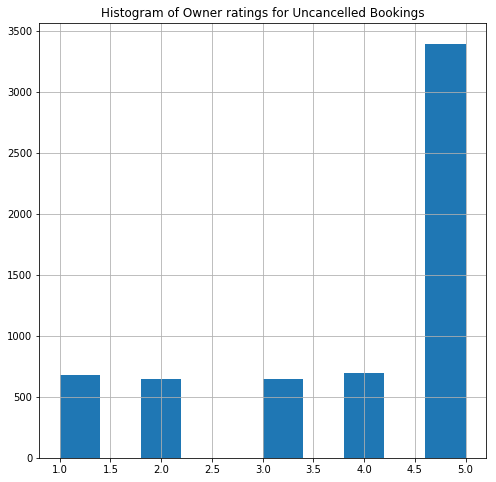

In [60]:
fig, ax = plt.subplots(figsize = (8,8))
providers['stars'].hist()
ax.set_title("Histogram of Owner ratings for Uncancelled Bookings")

In [61]:
requesters['stars'].value_counts()

5    17227
4     1339
1     1318
3     1313
2     1302
Name: stars, dtype: int64

Text(0.5,1,'Histogram of Requester ratings for Uncancelled Bookings')

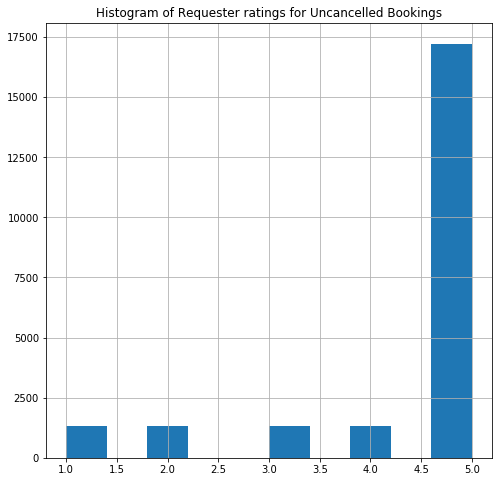

In [62]:
fig, ax = plt.subplots(figsize = (8,8))
requesters['stars'].hist()
ax.set_title("Histogram of Requester ratings for Uncancelled Bookings")

In [63]:
providers['stars'].mean() #average rating for providers

3.9048168921148134

In [64]:

requesters['stars'].mean() #average rating for customers

4.41584070403129

### Linear regression model with with identification as a Provider or Owner, units booked, and booking total as the predictor variables.
### Control for multiple ratings within each user with a random effects linear model.

In [65]:
import statsmodels.api as statsm
import statsmodels.formula.api as smf

### Rater id (0 being requesters and 1 being providers) is predictive of rating levels.  Providers rate interactions
### lower than requesters.  

In [66]:
#merged table of not cancelled bookings in conversations_conversation table with conversations_review table
request_reviews = pd.merge(left=conv_not_cancelled, right=conv_review, 
                  left_on=conv_not_cancelled['id'], right_on=conv_review['conversation_id'])

In [68]:
#just the provider reviews
providers = request_reviews[~request_reviews['reviewer_id'].isin(request_reviews['requester_id'])]

In [69]:
providers.head(1)

,key_0,id_x,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,id_y,content,stars,conversation_id,reviewer_id
6,19,19,2018-08-04,2018-08-05,1,2018-07-26 13:37:10.568236,29,NaN,64373,20273,2018-07-29 02:10:09.571217,NaN,7,Porta proin ridiculus vestibulum gravida orci ...,5,19,11942


In [70]:
#just the requester reviews
requesters = request_reviews[request_reviews['reviewer_id'].isin(request_reviews['requester_id'])]

In [71]:
requesters.head(1)

,key_0,id_x,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,id_y,content,stars,conversation_id,reviewer_id
0,7,7,2018-07-31,2018-08-04,4,2018-07-21 04:55:57.951572,100,NaN,64386,14783,2018-07-22 02:50:20.676664,NaN,1,Netus proin per duis dolor venenatis nam.,1,7,64386


In [72]:
providers['is_provider'] = 1
requesters['is_provider'] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
ratings = pd.concat([providers, requesters])

In [74]:
ratings.head(1)

,key_0,id_x,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,id_y,content,stars,conversation_id,reviewer_id,is_provider
6,19,19,2018-08-04,2018-08-05,1,2018-07-26 13:37:10.568236,29,NaN,64373,20273,2018-07-29 02:10:09.571217,NaN,7,Porta proin ridiculus vestibulum gravida orci ...,5,19,11942,1


In [75]:
rand_eff = smf.mixedlm('stars ~ is_provider + units + booking_total + units*booking_total', 
                       ratings, groups=ratings['reviewer_id'])

In [76]:
rand_eff_fit = rand_eff.fit()

In [77]:
rand_eff_fit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:              MixedLM   Dependent Variable:   stars      
No. Observations:   28561     Method:               REML       
No. Groups:         22420     Scale:                1.5310     
Min. group size:    1         Likelihood:           -46852.5912
Max. group size:    7         Converged:            Yes        
Mean group size:    1.3                                        
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            4.462    0.025 179.360 0.000  4.413  4.511
is_provider         -0.510    0.018 -28.099 0.000 -0.546 -0.475
units               -0.008    0.006  -1.386 0.166 -0.019  0.003
booking_total       -0.000    0.000  -2.037 0.042 -0.001 -0.000
units:booking_total  0.000    0.000   2.311 0.021  0.000  0.000
Group Var            0.023    0.014                            
===============================================================

"""

In [78]:
rand_eff_2 = smf.mixedlm('stars ~ is_provider + units + booking_total', 
                       ratings, groups=ratings['reviewer_id']) # model with no interaction term between units and booking

In [79]:
rand_eff_2_fit = rand_eff_2.fit()

In [80]:
rand_eff_2_fit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: stars      
No. Observations: 28561   Method:             REML       
No. Groups:       22420   Scale:              1.5312     
Min. group size:  1       Likelihood:         -46845.3740
Max. group size:  7       Converged:          Yes        
Mean group size:  1.3                                    
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      4.421    0.018 251.584 0.000  4.387  4.456
is_provider   -0.510    0.018 -28.104 0.000 -0.546 -0.475
units         -0.001    0.005  -0.296 0.767 -0.011  0.008
booking_total  0.000    0.000   0.054 0.957 -0.000  0.000
Group Var      0.023    0.014                            
=========================================================

"""

In [56]:
conv_not_cancelled['booking_total'].mean() #booking total means

177.38839597248528

In [86]:
one_star = requesters[requesters['stars'] == 1]
two_star = requesters[requesters['stars'] == 2]
len(one_star + two_star)  #count the number of 1 or 2 star reviews among owners

2620